# Import from libraries

In [1]:
pip install google.colab

     |████████████████████████████████| 72 kB 872 kB/s             
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 64 kB 1.8 MB/s             
     |████████████████████████████████| 104 kB 10.4 MB/s            
     |████████████████████████████████| 758 kB 11.0 MB/s            
     |████████████████████████████████| 8.0 MB 60.4 MB/s            
     |████████████████████████████████| 10.1 MB 46.9 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 57 kB 4.2 MB/s             
     |████████████████████████████████| 484 kB 51.5 MB/s            
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 245 kB 50.1 MB/s            
     |████████████████████████████████| 118 kB 64.6 MB/s            
     |████████████████████████████████| 133 kB 67.3 MB/s            
     |████████████████████████████████| 58 kB 6.3 MB/s         

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
path = '../input/rating-opencv-emotion-images/Images/train'

# Training and testing bases

In [4]:

training_generator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('../input/rating-opencv-emotion-images/Images/train',
                                                              target_size = (48, 48),
                                                              batch_size = 16,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 28709 images belonging to 7 classes.


In [5]:
training_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [6]:
training_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

<AxesSubplot:ylabel='count'>

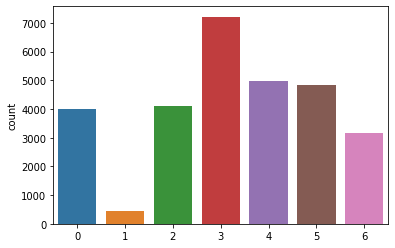

In [7]:
sns.countplot(x = training_dataset.classes)

In [8]:
folder_names = os.listdir(path)
print(folder_names)

['Surprise', 'Fear', 'Angry', 'Neutral', 'Sad', 'Disgust', 'Happy']


1269.jpg
3863.jpg
623.jpg
2193.jpg
3750.jpg
1269.jpg
3863.jpg
623.jpg
2193.jpg
3750.jpg
1269.jpg
623.jpg
2193.jpg
2008.jpg
2081.jpg
1269.jpg
3863.jpg
623.jpg
2193.jpg
3750.jpg
1269.jpg
3863.jpg
623.jpg
2193.jpg
3750.jpg
208.jpg
333.jpg
45.jpg
369.jpg
56.jpg
6234.jpg
1269.jpg
3863.jpg
6241.jpg
623.jpg


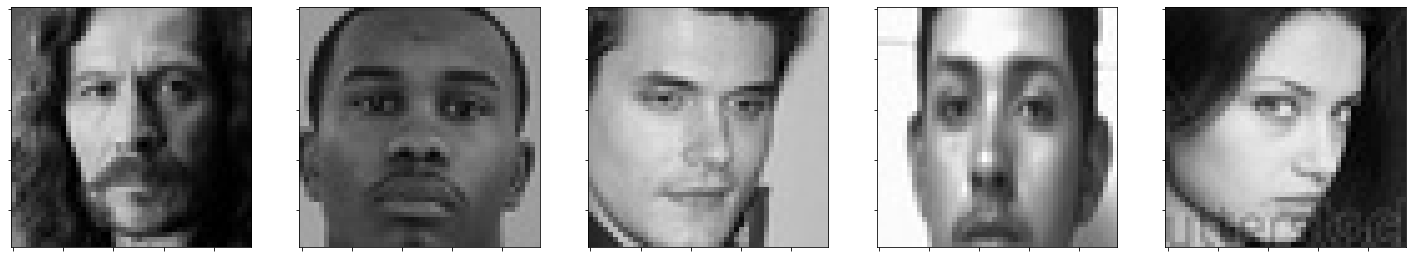

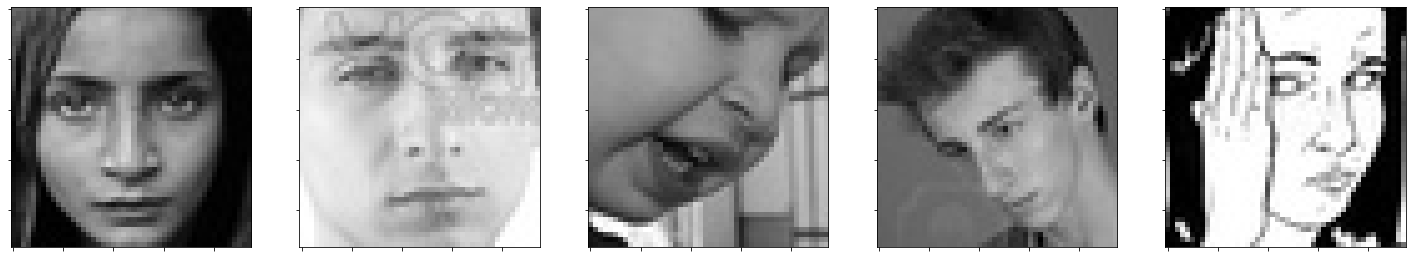

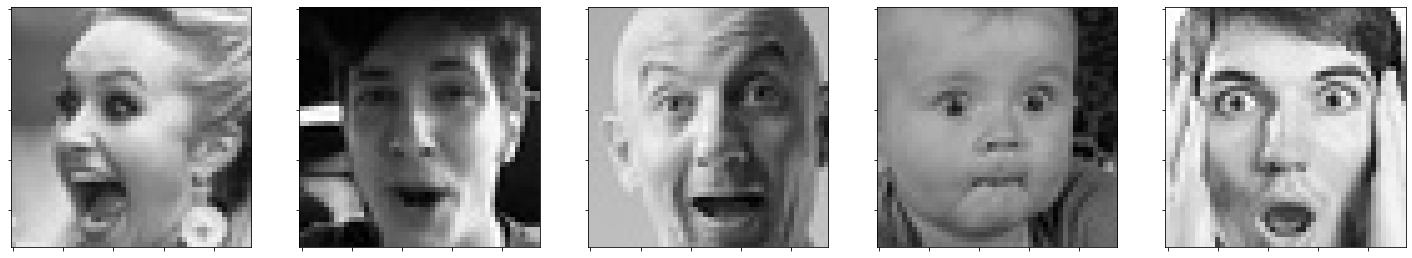

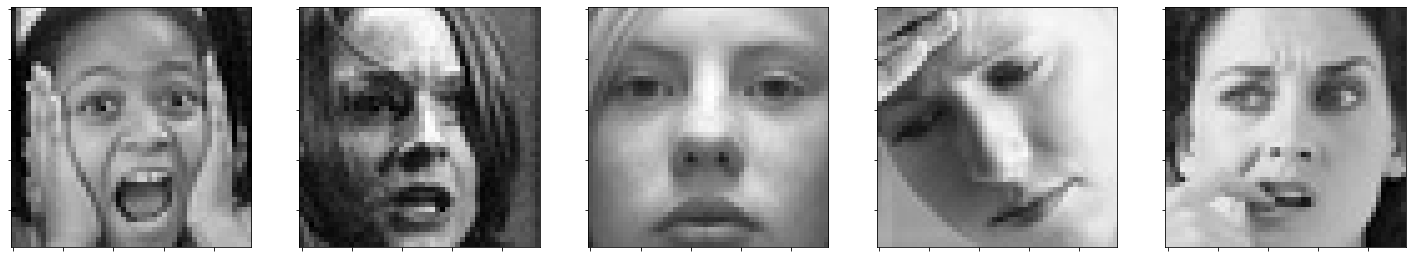

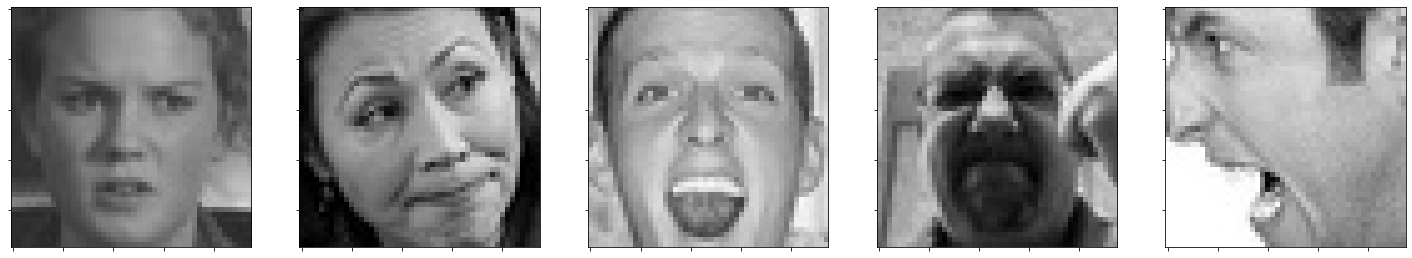

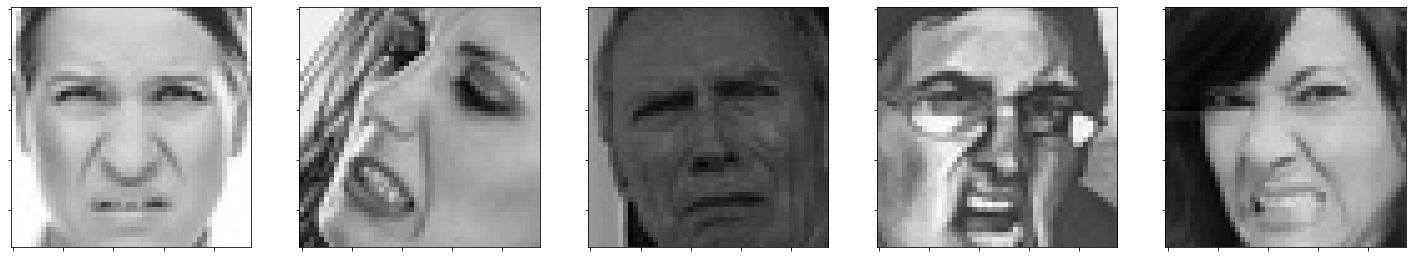

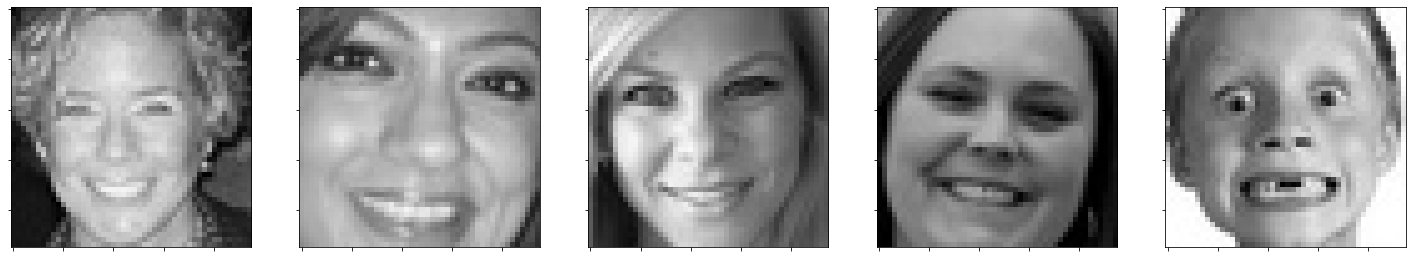

In [9]:
def plot_examples(folder_names, selected_folder, path):    
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(path + '/' + selected_folder)
    for i in range(5):
        print(file_names[i])
        img = cv2.imread(path + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
plot_examples(folder_names,'Neutral', path)
plot_examples(folder_names,'Sad', path)
plot_examples(folder_names,'Surprise', path)
plot_examples(folder_names,'Fear', path)
plot_examples(folder_names,'Angry', path)
plot_examples(folder_names,'Disgust', path)
plot_examples(folder_names,'Happy', path)

In [10]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('../input/rating-opencv-emotion-images/Images/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,  
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


# Construction and training of the neural network

In [11]:
number_classes = 7
detectors_number = 32 
width, height = 48, 48
epochs = 100
network = Sequential()

network.add(Conv2D(filters=number_classes, kernel_size=(3,3), activation='relu', padding='same', input_shape=(width, height, 3)))
network.add(BatchNormalization())  
network.add(Conv2D(filters=number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))
                            
network.add(Conv2D(filters=2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*2*number_classes, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units=2 * number_classes, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=2 * number_classes, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=number_classes, activation='softmax'))
print(network.summary())

2021-12-05 15:12:22.778011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 15:12:22.866246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 15:12:22.866965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 15:12:22.868073: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 7)         196       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 7)         28        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 7)         448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 7)         28        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 7)         0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 7)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 14)        8

In [12]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
network.fit(training_dataset, epochs=epochs)   

2021-12-05 15:12:25.732485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-12-05 15:12:27.912888: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1795/1795 [==============================] - 187s 100ms/step - loss: 1.8665 - accuracy: 0.2417
Epoch 2/100
1795/1795 [==============================] - 49s 27ms/step - loss: 1.7065 - accuracy: 0.3150
Epoch 3/100
1795/1795 [==============================] - 50s 28ms/step - loss: 1.6145 - accuracy: 0.3659
Epoch 4/100
1795/1795 [==============================] - 50s 28ms/step - loss: 1.5417 - accuracy: 0.3961
Epoch 5/100
1795/1795 [==============================] - 53s 30ms/step - loss: 1.4798 - accuracy: 0.4296
Epoch 6/100
1795/1795 [==============================] - 49s 27ms/step - loss: 1.4518 - accuracy: 0.4412
Epoch 7/100
1795/1795 [==============================] - 51s 28ms/step - loss: 1.4178 - accuracy: 0.4594
Epoch 8/100
1795/1795 [==============================] - 50s 28ms/step - loss: 1.3969 - accuracy: 0.4674
Epoch 9/100
1795/1795 [==============================] - 52s 29ms/step - loss: 1.3919 - accuracy: 0.4704
Epoch 10/100
1795/1795 [==============================] - 51s 28m

# Neural network evaluation

In [14]:
network.evaluate(test_dataset)

3589/3589 [==============================] - 21s 6ms/step - loss: 1.3376 - accuracy: 0.5280


[1.3375765085220337, 0.5280022025108337]

In [15]:
forecasts = network.predict(test_dataset)
forecasts

array([[4.16947782e-01, 7.53735006e-02, 9.89538357e-02, ...,
        2.32125059e-01, 1.46469101e-01, 1.38383908e-02],
       [8.99671078e-01, 6.06539473e-03, 5.91085143e-02, ...,
        2.58857291e-03, 1.10589908e-02, 9.80048813e-03],
       [8.21000099e-01, 1.74311418e-02, 6.15255050e-02, ...,
        1.46747492e-02, 4.24758680e-02, 6.85367640e-03],
       ...,
       [1.19072553e-02, 4.51358996e-04, 1.25083804e-01, ...,
        5.60963294e-03, 6.24693651e-03, 8.45020294e-01],
       [2.61320937e-02, 1.25474005e-03, 1.10324755e-01, ...,
        3.25329602e-02, 1.64730288e-02, 8.02563965e-01],
       [5.52023910e-02, 1.30389631e-03, 9.76967812e-02, ...,
        2.63920706e-02, 1.51383141e-02, 7.76652515e-01]], dtype=float32)

In [16]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 6, 6, 6])

In [17]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, forecasts)

0.5280022290331569

In [19]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[258,   1,  19,  27,  94,  79,  13],
       [ 31,   9,   4,   2,   2,   4,   3],
       [ 76,   4, 102,  25,  89, 156,  76],
       [ 22,   0,   8, 758,  46,  27,  18],
       [ 98,   1,  42, 150, 150, 123,  62],
       [ 50,   1,  33,  31, 151, 322,   6],
       [ 10,   1,  40,  31,  28,  10, 296]])

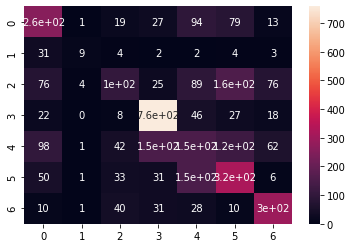

In [21]:
sns.heatmap(cm, annot=True);

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50       491
           1       0.53      0.16      0.25        55
           2       0.41      0.19      0.26       528
           3       0.74      0.86      0.80       879
           4       0.27      0.24      0.25       626
           5       0.45      0.54      0.49       594
           6       0.62      0.71      0.67       416

    accuracy                           0.53      3589
   macro avg       0.50      0.46      0.46      3589
weighted avg       0.51      0.53      0.51      3589



# Single image classification

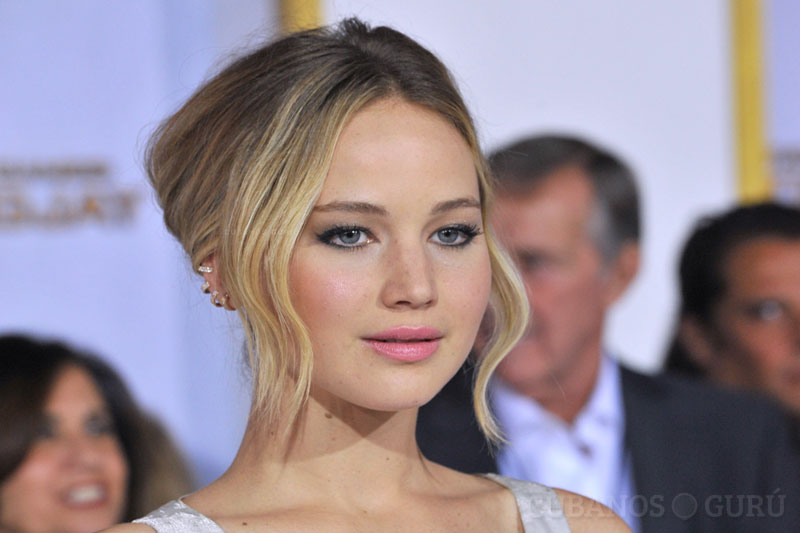

In [23]:
image = cv2.imread('../input/celebridades/Jennifer-Lawrence-2.jpg')
cv2_imshow(image)

In [24]:
image.shape

(533, 800, 3)

In [25]:
detector_face = cv2.CascadeClassifier('../input/casdadefrontal/haarcascade_frontalface_default.xml')

In [26]:
original_image = image.copy()
deteccoes = detector_face.detectMultiScale(original_image)

In [27]:
deteccoes

array([[270, 131, 262, 262],
       [ 36, 406,  85,  85]], dtype=int32)

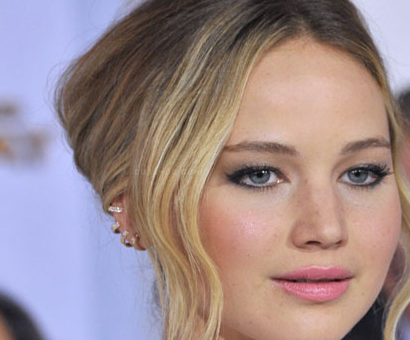

In [28]:
roi = image[60:280 + 120, 90:380 + 120]
cv2_imshow(roi)

In [29]:
roi.shape

(340, 410, 3)

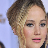

In [30]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

In [31]:
roi.shape

(48, 48, 3)

In [32]:
roi

array([[[237, 183, 175],
        [238, 183, 176],
        [238, 182, 177],
        ...,
        [236, 210, 204],
        [236, 208, 207],
        [236, 210, 205]],

       [[238, 184, 177],
        [239, 184, 177],
        [238, 183, 176],
        ...,
        [237, 212, 210],
        [237, 209, 208],
        [236, 208, 207]],

       [[238, 184, 177],
        [239, 184, 177],
        [239, 184, 177],
        ...,
        [238, 210, 209],
        [238, 209, 209],
        [234, 209, 207]],

       ...,

       [[ 68,  68,  87],
        [ 48,  42,  43],
        [ 54,  46,  47],
        ...,
        [109, 142, 171],
        [157, 152, 162],
        [116,  99, 107]],

       [[ 72,  89, 121],
        [ 55,  51,  60],
        [ 57,  46,  48],
        ...,
        [111, 148, 177],
        [113,  99, 104],
        [146, 115, 118]],

       [[ 91, 107, 149],
        [ 60,  62,  79],
        [ 50,  42,  43],
        ...,
        [112, 146, 175],
        [107,  93,  97],
        [160, 118, 122]]

In [33]:
roi = roi / 255
roi

array([[[0.92941176, 0.71764706, 0.68627451],
        [0.93333333, 0.71764706, 0.69019608],
        [0.93333333, 0.71372549, 0.69411765],
        ...,
        [0.9254902 , 0.82352941, 0.8       ],
        [0.9254902 , 0.81568627, 0.81176471],
        [0.9254902 , 0.82352941, 0.80392157]],

       [[0.93333333, 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        [0.93333333, 0.71764706, 0.69019608],
        ...,
        [0.92941176, 0.83137255, 0.82352941],
        [0.92941176, 0.81960784, 0.81568627],
        [0.9254902 , 0.81568627, 0.81176471]],

       [[0.93333333, 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        [0.9372549 , 0.72156863, 0.69411765],
        ...,
        [0.93333333, 0.82352941, 0.81960784],
        [0.93333333, 0.81960784, 0.81960784],
        [0.91764706, 0.81960784, 0.81176471]],

       ...,

       [[0.26666667, 0.26666667, 0.34117647],
        [0.18823529, 0.16470588, 0.16862745],
        [0.21176471, 0

In [34]:
roi.shape

(48, 48, 3)

In [35]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [36]:
probs = network.predict(roi)
probs

array([[0.09648039, 0.00427179, 0.08449631, 0.07710986, 0.4734238 ,
        0.2530559 , 0.01116193]], dtype=float32)

In [37]:
forecasts = np.argmax(probs)
forecasts

4

In [38]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

# Classification¶ 2

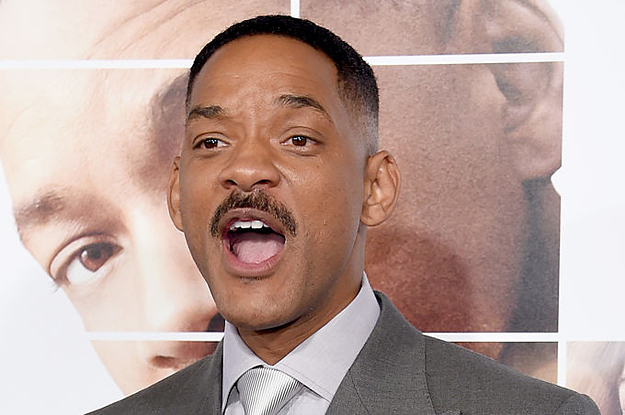

In [39]:
image = cv2.imread('../input/celebridades/17-impresionantes-datos-de-celebridades-que-te-de-2-19568-1493914661-8_dblbig.jpg')
cv2_imshow(image)

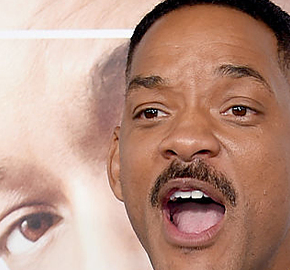

In [40]:
original_image = image.copy()
deteccoes = detector_face.detectMultiScale(original_image)
roi = image[30:200 + 100, 60:250 + 100]
cv2_imshow(roi)

In [41]:
roi = cv2.resize(roi, (48,48))
roi = roi / 255
roi = np.expand_dims(roi, axis = 0)
probs = network.predict(roi)
probs

array([[0.30882347, 0.01225051, 0.18358897, 0.25835875, 0.08393378,
        0.09594429, 0.05710023]], dtype=float32)

In [42]:
forecasts = np.argmax(probs)
forecasts

0

# Multiple image classification

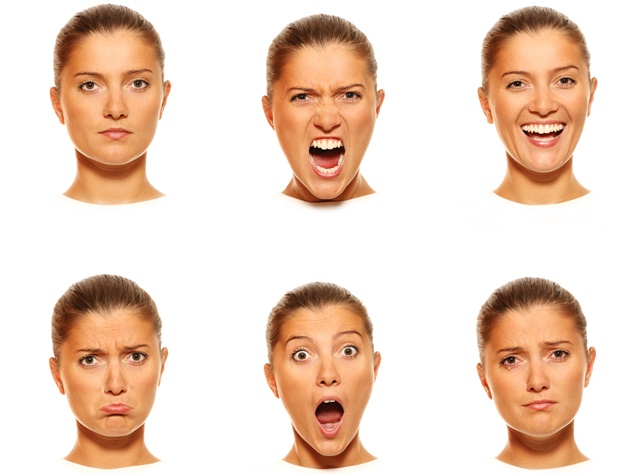

In [43]:
image = cv2.imread('../input/multiple/emocoes-trabalho.jpg')
cv2_imshow(image)

In [44]:
deteccoes = detector_face.detectMultiScale(image)
deteccoes

array([[ 54,  35, 122, 122],
       [481,  35, 118, 118],
       [266,  48, 122, 122],
       [487,  88, 118, 118],
       [475, 308, 122, 122],
       [ 52, 309, 123, 123],
       [265, 303, 124, 124]], dtype=int32)

In [45]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [46]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

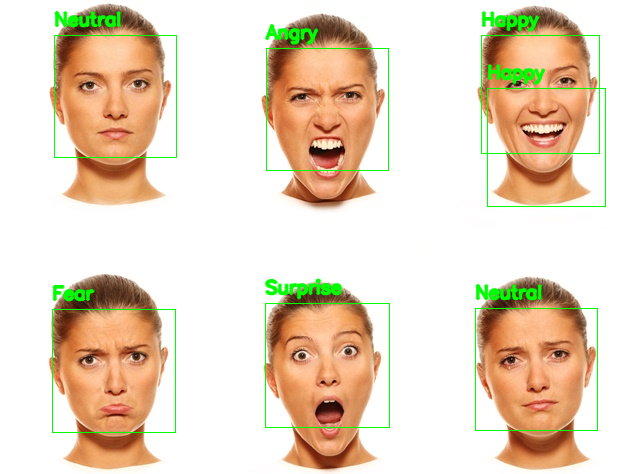

In [47]:
for (x, y, w, h) in deteccoes:
 
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 1)
  roi = image[y:y + h, x:x + w]
 
  roi = cv2.resize(roi, (48,48))

  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)

  forecasts = network.predict(roi)
  
  cv2.putText(image, emotions[np.argmax(forecasts)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(image)

# **If you find this notebook useful, support with an upvote** 👍¶¶